# Analyzing IGN Video Game Data - An Exploratory Data Analysis Using Pandas, Numpy and Matplotlib

![title](IGN_notebook_image.JPG)

Using a dataset from IGN, we will analyze video game data and get an insight on popular videos games for the most use video game platforms.

The python libraries which will be used for this projects are Numpy, Pandas and Matplotlib

In [493]:
#Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [494]:
%matplotlib inline

In [495]:
#The dataset is in a .csv format. We can read in the dataset using pd.read_csv function

ign_data = pd.read_csv("ign.csv")

In [496]:
ign_data

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11
6,6,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11
7,7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
8,8,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012,9,11
9,9,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/pc-142564,PC,7.0,Strategy,N,2012,9,11


In [497]:
#We can remove the "Unnamed: 0" column because we have already an integer index

ign_data.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [498]:
ign_data.drop("Unnamed: 0", axis=1, inplace=True)

In [499]:
ign_data.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [500]:
ign_data.tail()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28
18624,Masterpiece,Inside,/games/inside-playdead/pc-20055740,PC,10.0,Adventure,Y,2016,6,28


In [501]:
#We can get some high-level info about the dataset using the df.info() method
print("Numbers of rows and columns " + str(ign_data.shape))
print("\n")
ign_data.info()

Numbers of rows and columns (18625, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 10 columns):
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.4+ MB


In [502]:
#There seems to be sum null values in the genre column. We can count the null values using the isnull() method on the column

ign_data["genre"].isnull().sum()

36

In [503]:
#We can also see some statistics of all the columns using the describe() method. These will show numbers for only the numerical
#columns

ign_data.describe()

,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.00000,18625.000000
mean,6.950459,2006.515329,7.13847,15.603866
std,1.711736,4.587529,3.47671,8.690128
min,0.500000,1970.000000,1.00000,1.000000
25%,6.000000,2003.000000,4.00000,8.000000
50%,7.300000,2007.000000,8.00000,16.000000
75%,8.200000,2010.000000,10.00000,23.000000
max,10.000000,2016.000000,12.00000,31.000000


A number of observations from the dataframe above:
- "Score" column has a min value of 0.5 and max value of 10. Meaning all scores are range from 0 to 10
- "Release Year" has a min value of 1970 and max value of 2016. All game reviews are from 1970 to 2016

In [504]:
ign_data.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Below we can make frequency tables for the columns

In [505]:
ign_data["score_phrase"].value_counts(normalize=True) * 100

Great          25.626846
Good           25.455034
Okay           15.812081
Mediocre       10.518121
Amazing         9.685906
Bad             6.813423
Awful           3.565101
Painful         1.825503
Unbearable      0.386577
Masterpiece     0.295302
Disaster        0.016107
Name: score_phrase, dtype: float64

We can see that almost all the scores are in Mediocre - Great range. Though there are very few games that are unbearable or disaster, there are also very few games that are labelled Masterpiece

In [506]:
ign_data["title"].value_counts()

Open Season                                                    10
Cars                                                           10
Madden NFL 07                                                  10
LEGO Star Wars II: The Original Trilogy                         9
Brain Challenge                                                 9
Need for Speed Undercover                                       9
Ratatouille                                                     9
Madden NFL 08                                                   9
Spider-Man 2                                                    8
Puzzle Quest: Challenge of the Warlords                         8
Need for Speed ProStreet                                        8
2006 FIFA World Cup                                             8
Harry Potter and the Order of the Phoenix                       8
The Walking Dead: A Telltale Game Series -- Season Two          8
Tiger Woods PGA Tour 07                                         8
FIFA Socce

There seems to be duplicate titles. We can inspect this further

In [507]:
ign_data[ign_data["title"] == "Open Season"]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
8252,Good,Open Season,/games/open-season-the-game/nds-822778,Nintendo DS,7.0,"Action, Adventure",N,2006,9,26
8302,Okay,Open Season,/games/open-season-the-game/gcn-822780,GameCube,6.0,"Action, Adventure",N,2006,10,3
8303,Okay,Open Season,/games/open-season-the-game/xbox-822786,Xbox,6.0,"Action, Adventure",N,2006,10,3
8304,Okay,Open Season,/games/open-season-the-game/xbox-360-822787,Xbox 360,6.3,"Action, Adventure",N,2006,10,3
8305,Okay,Open Season,/games/open-season-the-game/ps2-726615,PlayStation 2,6.0,"Action, Adventure",N,2006,10,3
8328,Okay,Open Season,/games/open-season-the-game/pc-822785,PC,6.0,"Action, Adventure",N,2006,10,3
8345,Good,Open Season,/games/open-season-the-game/gba-822779,Game Boy Advance,7.5,"Action, Adventure",N,2006,9,28
8398,Okay,Open Season,/games/open-season-the-game/psp-822777,PlayStation Portable,6.3,"Action, Adventure",N,2006,10,11
8419,Good,Open Season,/games/open-season-the-game/cell-827379,Wireless,7.3,Platformer,N,2006,10,16
8839,Okay,Open Season,/games/open-season-the-game/wii-827223,Wii,6.0,"Action, Adventure",N,2007,1,30


There are not duplicates but the same titles for different platforms. They also have different scores

In [508]:
ign_data["platform"].value_counts()

PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      

Most games in the dataset are for PC followed by PlayStation 2, Xbox360 and Wii

In [509]:
ign_data["platform"].value_counts().head(10)

PC               3370
PlayStation 2    1686
Xbox 360         1631
Wii              1366
PlayStation 3    1356
Nintendo DS      1045
PlayStation       952
Wireless          910
iPhone            842
Xbox              821
Name: platform, dtype: int64

In [510]:
ign_data["genre"].value_counts().head(10)

Action               3797
Sports               1916
Shooter              1610
Racing               1228
Adventure            1175
Strategy             1071
RPG                   980
Platformer            823
Puzzle                776
Action, Adventure     765
Name: genre, dtype: int64

Action genre leads the genre of video games, followed by sports, shooter and racing

In [511]:
ign_data.dtypes

score_phrase       object
title              object
url                object
platform           object
score             float64
genre              object
editors_choice     object
release_year        int64
release_month       int64
release_day         int64
dtype: object

In [512]:
ign_data.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


We can combine the release month, year and date column to a combined datetime object column "release_date"

In [513]:
import datetime as dt

In [514]:
ign_data["release_date"] = pd.to_datetime(ign_data["release_year"]*10000+ign_data["release_month"]*100+ign_data["release_day"],format='%Y%m%d')

In [515]:
ign = ign_data.drop(["release_year","release_month","release_day"],axis=1)

In [516]:
#We can see that the object type has been changed to datetime object

ign["release_date"]

0       2012-09-12
1       2012-09-12
2       2012-09-12
3       2012-09-11
4       2012-09-11
5       2012-09-11
6       2012-09-11
7       2012-09-11
8       2012-09-11
9       2012-09-11
10      2012-09-11
11      2012-09-11
12      2012-09-10
13      2012-09-07
14      2012-09-07
15      2012-09-06
16      2012-09-06
17      2012-09-05
18      2012-09-03
19      2012-09-03
20      2012-09-03
21      2012-08-31
22      2012-08-31
23      2012-08-31
24      2012-08-31
25      2012-08-30
26      2012-08-30
27      2012-08-29
28      2012-08-29
29      2012-08-28
           ...    
18595   2016-07-16
18596   2016-07-14
18597   2016-07-13
18598   2016-07-13
18599   2016-07-13
18600   2016-08-19
18601   2016-08-19
18602   2016-08-19
18603   2016-08-18
18604   2016-08-17
18605   2016-08-16
18606   2016-08-04
18607   2016-07-13
18608   2016-07-13
18609   2016-07-12
18610   2016-07-12
18611   2016-07-06
18612   2016-07-06
18613   2016-07-01
18614   2016-06-29
18615   2016-06-29
18616   2016

In [517]:
ign

,score_phrase,title,url,platform,score,genre,editors_choice,release_date
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012-09-12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012-09-12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012-09-12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012-09-11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012-09-11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012-09-11
6,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012-09-11
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012-09-11
8,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012-09-11
9,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/pc-142564,PC,7.0,Strategy,N,2012-09-11


In [518]:
len(ign[ign["score"].between(5,10)])

16277

In [519]:
#We can also drop the url column

ign.drop("url",axis=1,inplace=True)

In [520]:
ign.head()

,score_phrase,title,platform,score,genre,editors_choice,release_date
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012-09-12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012-09-12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012-09-12
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012-09-11
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012-09-11


We can find the mean of the score column and do further analysis of games that are equal to or greater than the mean.

In [521]:
ign.score.mean()
print("The mean of score is: {:.2f}".format(ign.score.mean()))

The mean of score is: 6.95


We can seperate the dataframes as per the top 5 platforms

In [522]:
ign_pc = ign[ign["platform"] == "PC"]

In [523]:
#Lets find the corelations between release date and score. If the scores have increased with newer games

In [524]:
ign_data.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


We can see that there is no correlation between the release year and the score

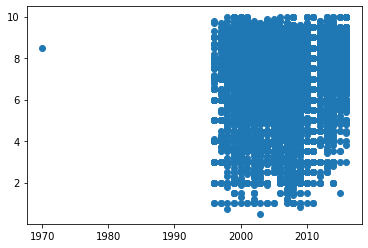

In [525]:
plt.scatter(y=ign_data["score"],x=ign_data["release_year"])

In [526]:
ign_data[ign_data["release_year"].between(1960,1995)]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,release_date
516,Great,The Walking Dead: The Game -- Episode 1: A New...,/games/the-walking-dead-season-1-episode-1/xbo...,Xbox 360,8.5,Adventure,N,1970,1,1,1970-01-01


From the scatter plot, we can see that there is one outlier, a game released in 1970. All other games are released between 1996 onwards. From the wikipedia page and the official website of the game. The first episode "A New Day" of the "Walking Dead: The Game" game series was released in April 24, 2012; only 7 years ago. We can consider this as a wrong data and delete the row

In [527]:
ign["release_year"] = ign["release_date"].dt.year

In [528]:
ign.head()

,score_phrase,title,platform,score,genre,editors_choice,release_date,release_year
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012-09-12,2012
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012-09-12,2012
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012-09-12,2012
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012-09-11,2012
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012-09-11,2012


In [529]:
ign["release_year"].between(1970,1995).sum()

1

Since there is only one game from 1970 to 1995. we can shorten our data from and include games from 1996 to the max year which is 2016

In [530]:
ign = ign[ign["release_year"].between(1996,2017)]

In [531]:
ign.sort_values(by="release_year")

,score_phrase,title,platform,score,genre,editors_choice,release_date,release_year
520,Mediocre,Skeleton Warriors,PlayStation,5.0,Action,N,1996-11-25,1996
460,Mediocre,NBA In the Zone,PlayStation,5.0,Sports,N,1996-11-25,1996
461,Good,Magic Carpet,PlayStation,7.5,Action,N,1996-11-25,1996
462,Painful,Power Serve 3D Tennis,PlayStation,2.0,Sports,N,1996-11-25,1996
463,Great,Resident Evil [1996],PlayStation,8.7,"Action, Adventure",N,1996-11-25,1996
464,Okay,NCAA GameBreaker,PlayStation,6.8,Sports,N,1996-11-25,1996
556,Great,Tempest X3: An Inter-Galactic Battle Zone,PlayStation,8.0,Action,N,1996-12-17,1996
555,Mediocre,MLB Pennant Race,PlayStation,5.0,Sports,N,1996-12-17,1996
554,Mediocre,Pitball,PlayStation,5.0,Action,N,1996-12-18,1996
553,Okay,Mortal Kombat Trilogy,PlayStation,6.0,Fighting,N,1996-12-19,1996


In [532]:
ign["editors_choice"] = ign["editors_choice"].map(dict(Y=1,N=0))

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [533]:
ign.head()

,score_phrase,title,platform,score,genre,editors_choice,release_date,release_year
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,1,2012-09-12,2012
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,1,2012-09-12,2012
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,0,2012-09-12,2012
3,Great,NHL 13,Xbox 360,8.5,Sports,0,2012-09-11,2012
4,Great,NHL 13,PlayStation 3,8.5,Sports,0,2012-09-11,2012


In [534]:
ign.corr()

,score,editors_choice,release_year
score,1.000000,0.540711,0.063212
editors_choice,0.540711,1.000000,0.018174
release_year,0.063212,0.018174,1.000000


(array([  43.,  228.,  491.,  899., 1613., 2100., 3587., 4790., 3931.,
         942.]),
 array([ 0.5 ,  1.45,  2.4 ,  3.35,  4.3 ,  5.25,  6.2 ,  7.15,  8.1 ,
         9.05, 10.  ]),
 <a list of 10 Patch objects>)

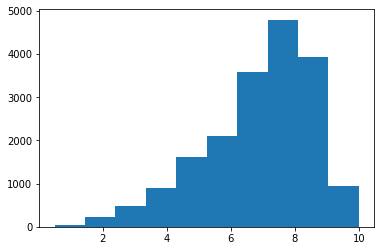

In [535]:
plt.hist(ign["score"],bins=10)

From the graph we can see that most video game scores are in 6-9 score range

In [536]:
ign.head()

,score_phrase,title,platform,score,genre,editors_choice,release_date,release_year
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,1,2012-09-12,2012
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,1,2012-09-12,2012
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,0,2012-09-12,2012
3,Great,NHL 13,Xbox 360,8.5,Sports,0,2012-09-11,2012
4,Great,NHL 13,PlayStation 3,8.5,Sports,0,2012-09-11,2012


We can find the ranges of scores for the major platforms

In [537]:
ign_pc = ign[ign["platform"] == "PC"]

In [538]:
ign_pc.describe()

,score,editors_choice,release_year
count,3370.000000,3370.000000,3370.000000
mean,7.147359,0.201484,2006.235608
std,1.618069,0.401168,5.236041
min,0.700000,0.000000,1996.000000
25%,6.300000,0.000000,2001.000000
50%,7.500000,0.000000,2006.000000
75%,8.400000,0.000000,2011.000000
max,10.000000,1.000000,2016.000000


In [539]:
ign[ign["score"] > 7]["platform"].value_counts()

PC                      1968
Xbox 360                 908
PlayStation 2            864
PlayStation 3            783
Wireless                 554
iPhone                   531
Wii                      512
Xbox                     489
PlayStation              424
Nintendo DS              356
PlayStation Portable     277
GameCube                 270
Game Boy Advance         267
PlayStation 4            193
Dreamcast                186
Nintendo 64              168
Xbox One                 140
Nintendo 3DS             136
Game Boy Color           110
PlayStation Vita          98
Nintendo DSi              95
Wii U                     75
iPad                      71
Macintosh                 60
Lynx                      35
Android                   28
Super NES                 27
Genesis                   25
NES                       23
TurboGrafx-16             18
NeoGeo Pocket Color       17
N-Gage                    16
Game Boy                  14
iPod                      10
Linux         

We can see that if we only select the games that has a score above the mean, PC leads followed by Xbox 360, Playstation 2 and PlayStation3. Since PC games have games from 1996 and Playstation, Xbox and Nintendo games are divided among different versions. We can combine them

In [540]:
len(ign[ign["platform"] == "PlayStation"])

952

In [541]:
ign["platform"] = ign["platform"].replace({"PlayStation 2": "PlayStation"})

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [542]:
ign.head()

,score_phrase,title,platform,score,genre,editors_choice,release_date,release_year
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,1,2012-09-12,2012
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,1,2012-09-12,2012
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,0,2012-09-12,2012
3,Great,NHL 13,Xbox 360,8.5,Sports,0,2012-09-11,2012
4,Great,NHL 13,PlayStation 3,8.5,Sports,0,2012-09-11,2012


In [543]:
ign["platform"] = ign["platform"].replace({"PlayStation 3": "PlayStation",
                                          "PlayStation 4": "PlayStation"})

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [544]:
ign["platform"] = ign["platform"].replace({"Xbox 360": "Xbox",
                                          "Xbox One": "Xbox",
                                          "Wii U": "Wii"})

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1996


2016


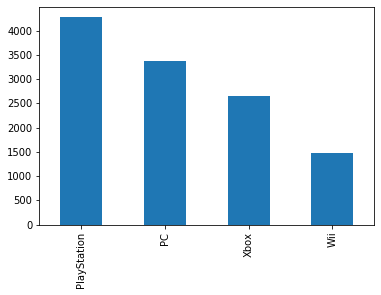

In [545]:
print(ign["release_year"].min())
print("\n")
print(ign["release_year"].max())
ign["platform"].value_counts().head(4).plot(kind="bar")

From this bar chart we can see that from 1996 - 2016, Sony Playstation has released the highest number of games followed by PC, Microsoft Xbox and the least games released on Nintendo Wii

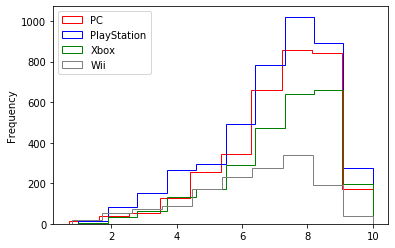

In [575]:
ign[ign["platform"] == "PC"]["score"].plot(kind="hist", color="red", histtype='step', label="PC")
ign[ign["platform"] == "PlayStation"]["score"].plot(kind="hist", color="blue", histtype="step", label="PlayStation")
ign[ign["platform"] == "Xbox"]["score"].plot(kind="hist", color="green", histtype="step", label="Xbox")
ign[ign["platform"] == "Wii"]["score"].plot(kind="hist", color="grey", histtype="step", label="Wii")
plt.legend(loc="upper left")

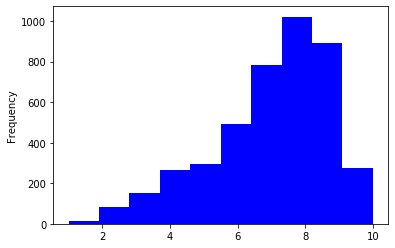

In [558]:
ign[ign["platform"] == "PlayStation"]["score"].plot(kind="hist", color="blue")

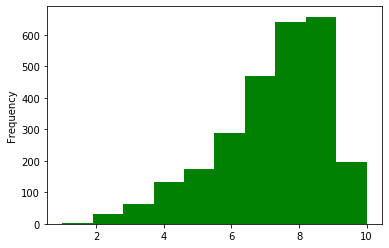

In [560]:
ign[ign["platform"] == "Xbox"]["score"].plot(kind="hist", color="green")

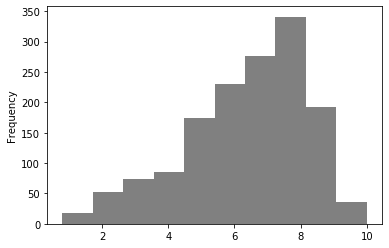

In [561]:
ign[ign["platform"] == "Wii"]["score"].plot(kind="hist", color="grey")

We can see that almost all the score for our selected platform ranges from 6-10. We can only focus on the games that has a score equal or greater than the mean

In [546]:
print(ign["score"].mean())

6.9503758591065115


In [547]:
ign_rating = ign[ign["score"] >= 7]

In [548]:
filter_platform = ['PlayStation', 'PC', 'Xbox', 'Wii']
ign_rating = ign_rating[ign_rating.platform.isin(filter_platform)]

PlayStation    2612
PC             2191
Xbox           1708
Wii             736
Name: platform, dtype: int64




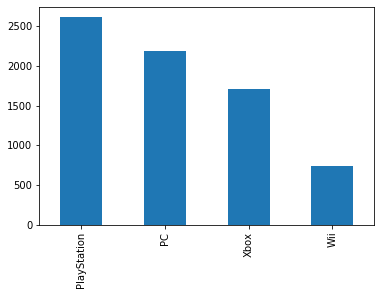

In [549]:
print(ign_rating["platform"].value_counts())
print("\n")
ign_rating["platform"].value_counts().plot(kind="bar")

Above, we have listed only the games with a score of 7 and above(mean score) and only chosen the platforms in the graph

Lets find out the platforms with the highest ratings

In [580]:
ign_rating[ign_rating["score"] > 9]["platform"].value_counts()

PlayStation    275
Xbox           195
PC             174
Wii             36
Name: platform, dtype: int64

PlayStation    14
Xbox            9
PC              5
Wii             4
Name: platform, dtype: int64


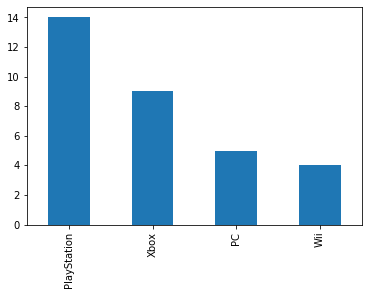

In [421]:
print(ign_rating[ign_rating["score"] == 10.0]["platform"].value_counts())
ign_rating[ign_rating["score"] == 10.0]["platform"].value_counts().plot(kind="bar")

In [473]:
only_titles = ign_rating.drop_duplicates(subset="title",keep="last")

In [585]:
only_titles[only_titles["score"] == 10.0][["title","genre","release_year"]]

,title,genre,release_year
8981,The Legend of Zelda: Ocarina of Time,"Action, Adventure",2007
10838,Grand Theft Auto IV (Special Edition),Action,2008
11031,Metal Gear Solid 4: Guns of the Patriots,Action,2008
11121,Metal Gear Solid 4: Guns of the Patriots (Limi...,Action,2008
14689,Super Mario Galaxy 2,Platformer,2010
15237,Pac-Man Championship Edition DX,Action,2010
15321,Red Dead Redemption -- Undead Nightmare,"Action, Adventure",2010
15757,Chrono Trigger,"Action, RPG",2011
16279,Uncharted 3: Drake's Deception,"Action, Adventure",2011
16350,The Legend of Zelda: Skyward Sword,"Action, Adventure",2011


2008    423
2009    403
2007    350
2010    317
2003    314
2000    290
2011    287
2002    285
2004    275
2001    253
2005    250
2006    236
1999    233
2012    215
2013    197
2014    182
2015    169
1998    148
2016    105
1997     93
1996     56
Name: release_year, dtype: int64


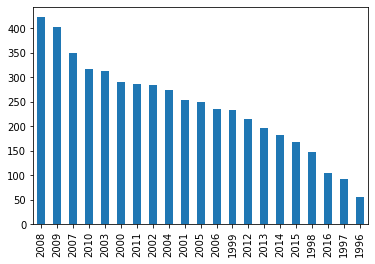

In [602]:
print(only_titles["release_year"].value_counts())
only_titles["release_year"].value_counts().plot("bar")

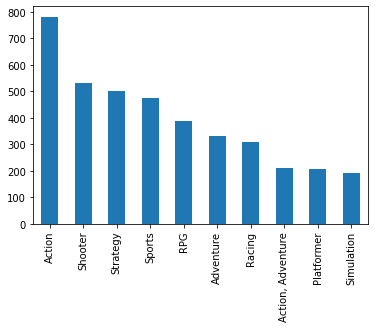

In [607]:
only_titles["genre"].value_counts().head(10).plot("bar")

# Conclusion

From this EDA, we can see that most popular gaming platform has a mean score of 7 with PlayStation the highest number of 10 rating, followed by Xbox. The least number of games were released by Nintendo Wii of the top competitors. 

The highest rating games were released from 2007 - 2008 and the genre with the highest rating was "Action games" with only one game in the platformer genre which was Mario SUper Brothers